In [153]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [124]:
haberMan = pd.read_csv("haberman.csv")
haberMan


,age,op-year,axil_node,Surv_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [125]:
haberMan.shape

(306, 4)

In [126]:
haberMan.columns

Index(['age', 'op-year', 'axil_node', 'Surv_status'], dtype='object')

In [127]:
haberMan.describe()


,age,op-year,axil_node,Surv_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [128]:
haberMan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          306 non-null    int64
 1   op-year      306 non-null    int64
 2   axil_node    306 non-null    int64
 3   Surv_status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [129]:
# Surv_status=1:Survive`
# Surv_status = 2:Dead
# Hence we will replace 1 with Survive and 2 with Dead
haberMan['Surv_status']=haberMan['Surv_status'].map({1:"survived", 2:"dead"})
haberMan 

,age,op-year,axil_node,Surv_status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived
...,...,...,...,...
301,75,62,1,survived
302,76,67,0,survived
303,77,65,3,survived
304,78,65,1,dead


Count the number of patient are dead and alive?


In [130]:
haberMan.Surv_status.value_counts()

survived    225
dead         81
Name: Surv_status, dtype: int64

Find the minimum age at which patient is dead ?


In [131]:
np.min(haberMan.age[haberMan.Surv_status=='dead'])


34

Find the maximum age at which patient is survive ?

In [132]:
np.max(haberMan.age[haberMan.Surv_status=='survived'])

77

Plot a scatter graph between age and op-year ?

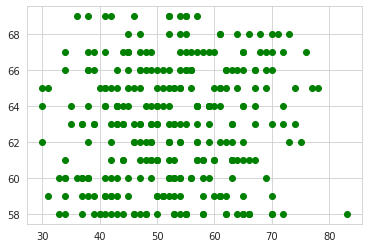

In [133]:
plt.scatter(x=haberMan.age,y=haberMan['op-year'],c='g')
plt.show()

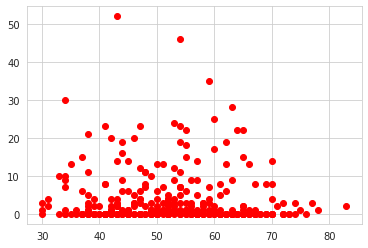

In [134]:
plt.scatter(x=haberMan.age,y=haberMan.axil_node,c='r')
plt.show()

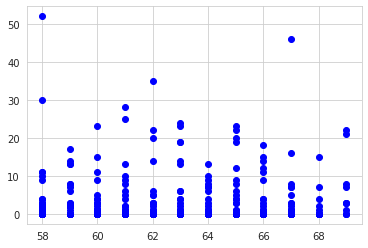

In [135]:
plt.scatter(x=haberMan['op-year'],y=haberMan.axil_node,c='b')
plt.show()

Plot the pairplot between each of given attributes ?

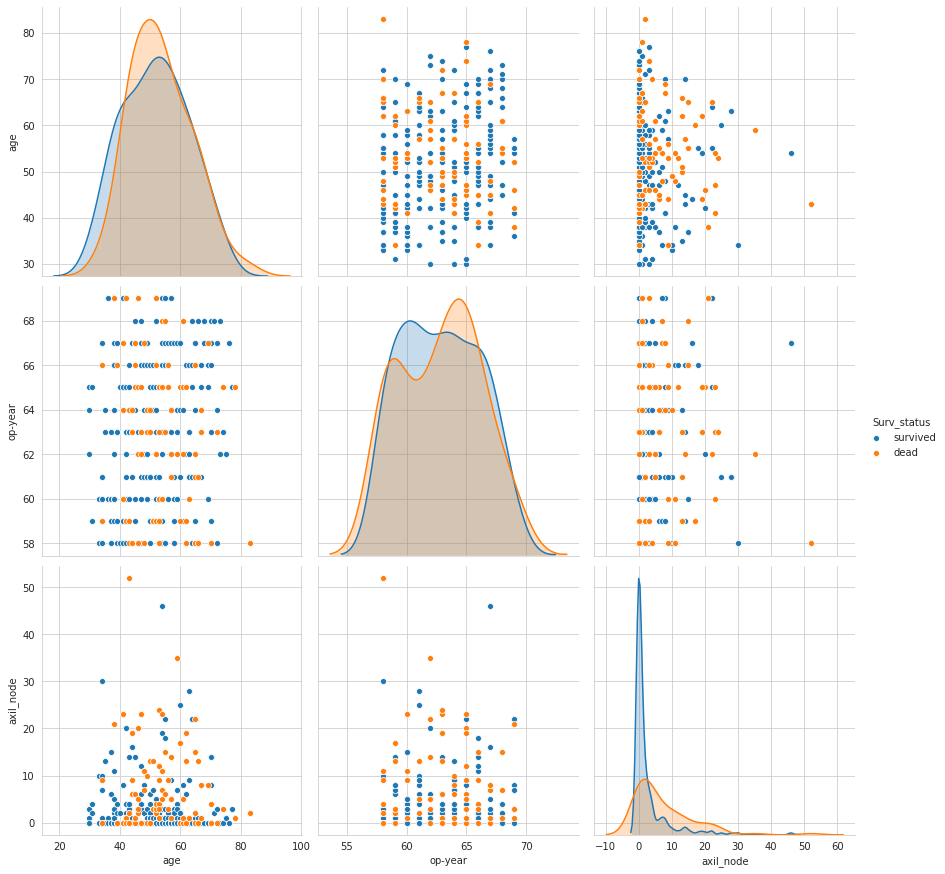

In [136]:
sns.set_style('whitegrid')
sns.pairplot(data=haberMan,hue='Surv_status',height=4)
plt.show()

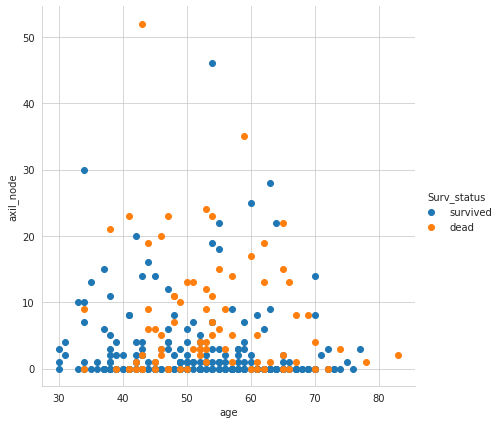

In [137]:
sns.set_style('whitegrid')
sns.FacetGrid(data=haberMan,hue='Surv_status',height=6).\
    map(plt.scatter,'age','axil_node').\
    add_legend()
plt.show()

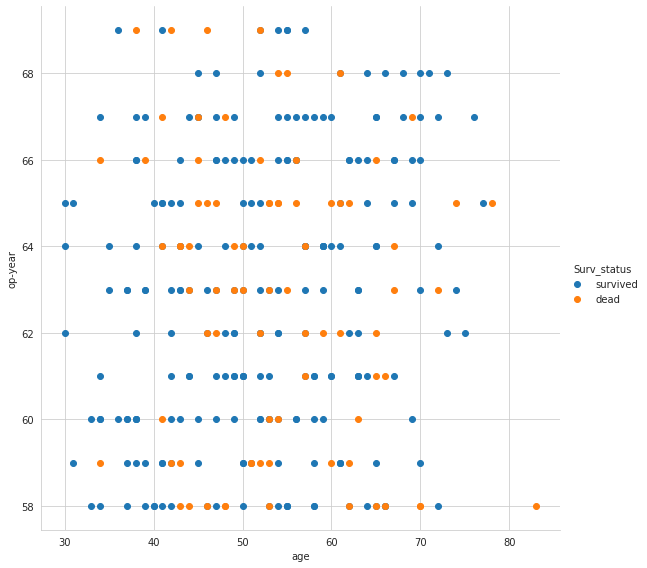

In [138]:
sns.set_style('whitegrid')
sns.FacetGrid(data=haberMan,hue='Surv_status',height=8).\
    map(plt.scatter,'age','op-year').\
    add_legend()
plt.show()


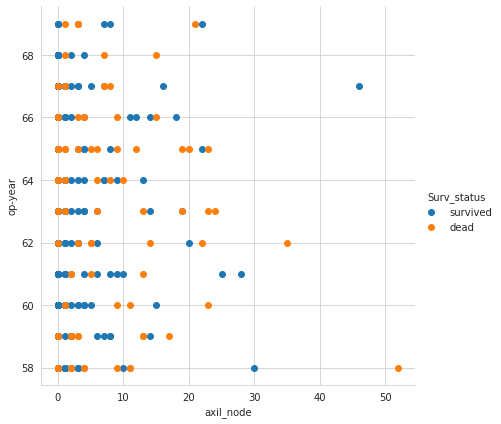

In [139]:
sns.set_style('whitegrid')
sns.FacetGrid(data=haberMan,hue='Surv_status',height=6).\
    map(plt.scatter,'axil_node','op-year').\
    add_legend()
plt.show()


Draw pdf of each attributes ?

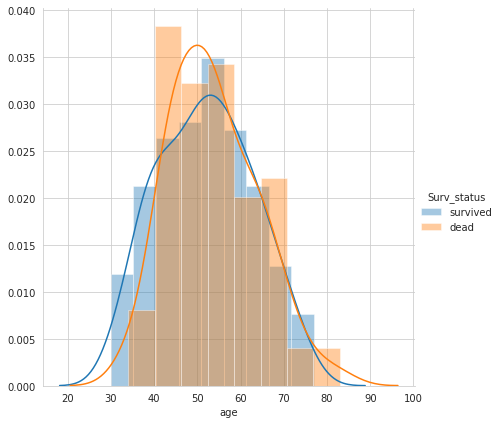

In [140]:
sns.set_style('whitegrid')
sns.FacetGrid(data=haberMan,hue='Surv_status',height=6).\
    map(sns.distplot,'age').\
    add_legend()
plt.show()


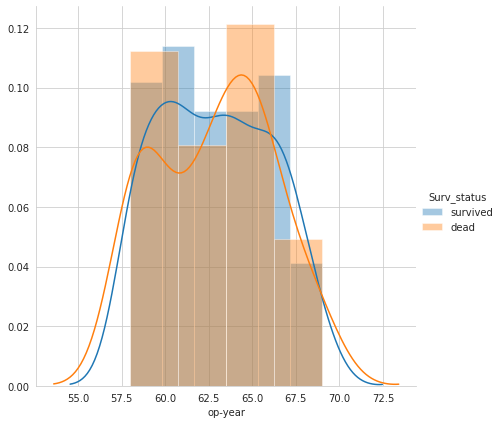

In [141]:
sns.set_style('whitegrid')
sns.FacetGrid(data=haberMan,hue='Surv_status',height=6).\
    map(sns.distplot,'op-year').\
    add_legend()
plt.show()

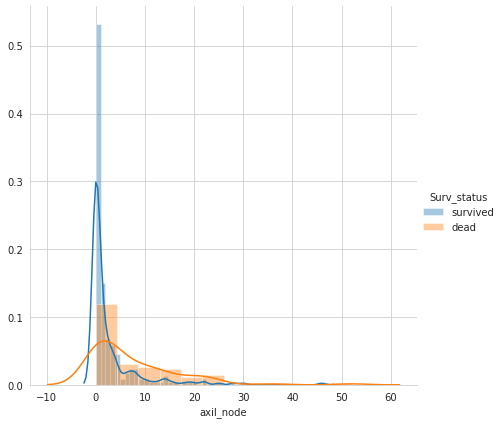

In [142]:
sns.set_style('whitegrid')
sns.FacetGrid(data=haberMan,hue='Surv_status',height=6).\
    map(sns.distplot,'axil_node').\
    add_legend()
plt.show()

CDF 

In [143]:
count,bin_edges=np.histogram(haberMan.age,bins=10,density=True)
print(bin_edges)
print(count)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.00986558 0.01664817 0.02836355 0.03267974 0.03391294 0.02528055
 0.02528055 0.01109878 0.00431619 0.0012332 ]
[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


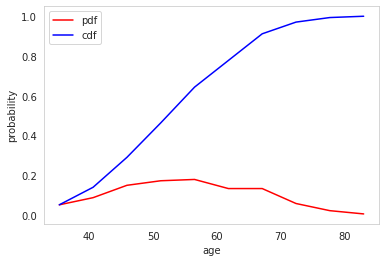

In [144]:
plt.plot(bin_edges[1:],pdf,label='pdf',color='r')
plt.plot(bin_edges[1:],cdf,label='cdf',c='b')
plt.xlabel("age")
plt.ylabel('probability')
plt.grid()
plt.legend()
plt.show()

In [145]:
count,bin_edges=np.histogram(haberMan['op-year'],bins=10,density=True)
print(bin_edges)
print(count)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.18716578 0.08318479 0.07724302 0.06833036 0.08912656 0.09209745
 0.08318479 0.08318479 0.07427213 0.07130125]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


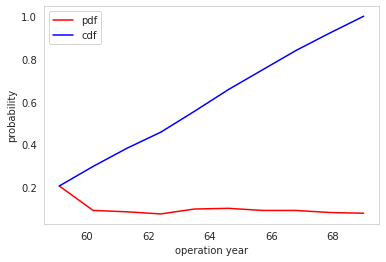

In [146]:
plt.plot(bin_edges[1:],pdf,label='pdf',color='r')
plt.plot(bin_edges[1:],cdf,label='cdf',c='b')
plt.xlabel("operation year")
plt.ylabel('probability')
plt.grid()
plt.legend()
plt.show()


In [147]:
count,bin_edges=np.histogram(haberMan.axil_node,bins=10,density=True)
print(bin_edges)
print(count)
pdf = count/sum(count)
cdf = np.cumsum(pdf)
print(pdf)
print(cdf)

[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
[0.14831574 0.0188537  0.01131222 0.00502765 0.00565611 0.00125691
 0.00062846 0.         0.00062846 0.00062846]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


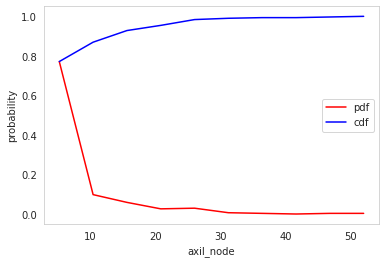

In [148]:
plt.plot(bin_edges[1:],pdf,label='pdf',color='r')
plt.plot(bin_edges[1:],cdf,label='cdf',c='b')
plt.xlabel("axil_node")
plt.ylabel('probability')
plt.grid()
plt.legend()
plt.show()

Different Kind of plot

1.Boxplot

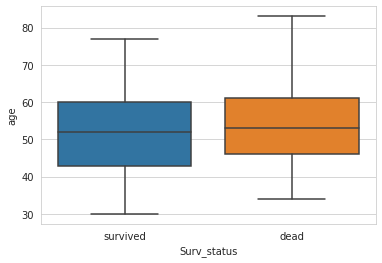

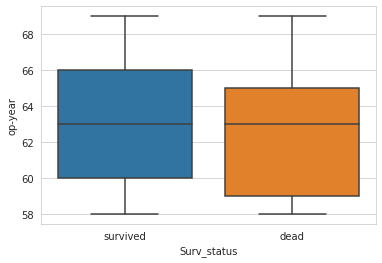

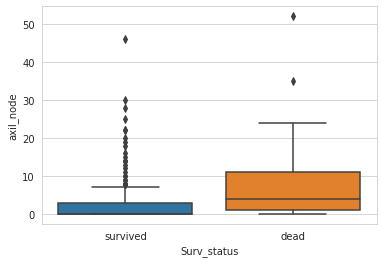

In [149]:
col = haberMan.columns
for i in col[:3]:
    sns.boxplot(x=col[3],y=i,data=haberMan)
    plt.show()
    plt.close()
    

2.ViolinPlot

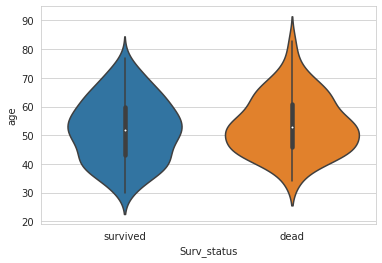

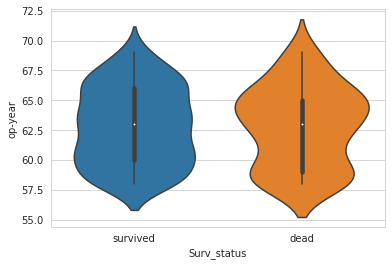

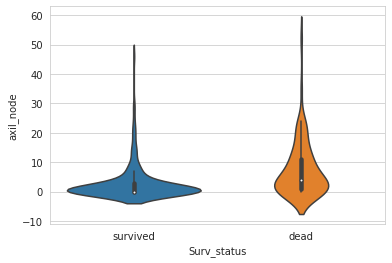

In [150]:
col = haberMan.columns
for i in col[:3]:
    sns.violinplot(x=col[3],y=i,data=haberMan)
    plt.show()
    plt.close()
    



3.BarPlot

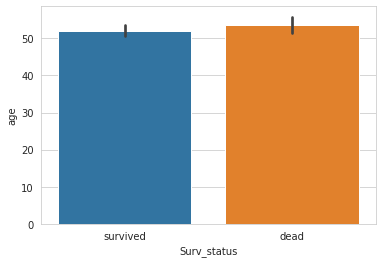

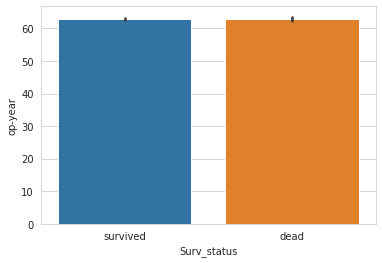

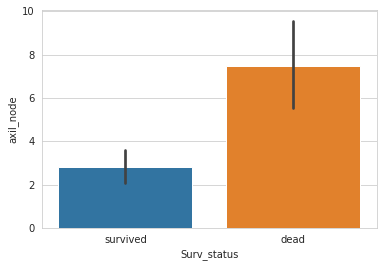

In [151]:
for i in col[:3]:
    sns.barplot(x=col[3],y=i,data=haberMan)
    plt.show()
    plt.close()
      

3D plot 
(like Contour plot)



dead

survived


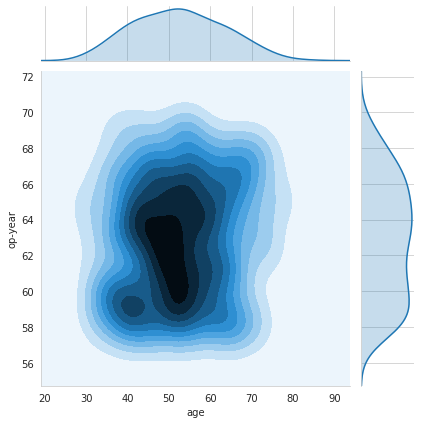

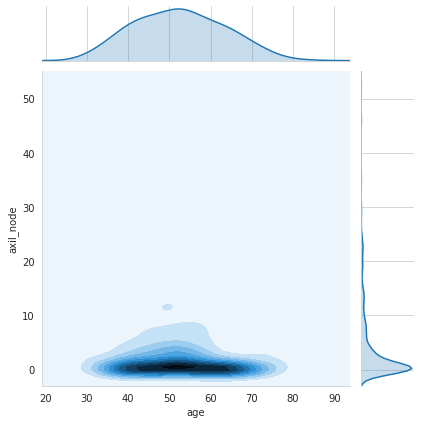

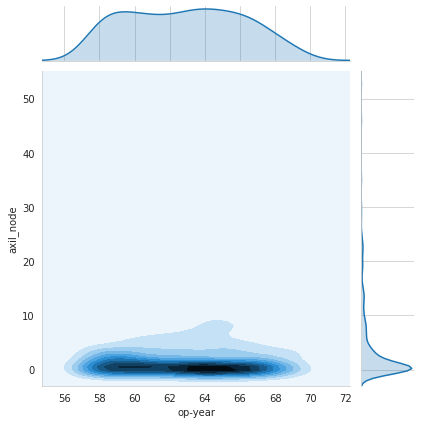

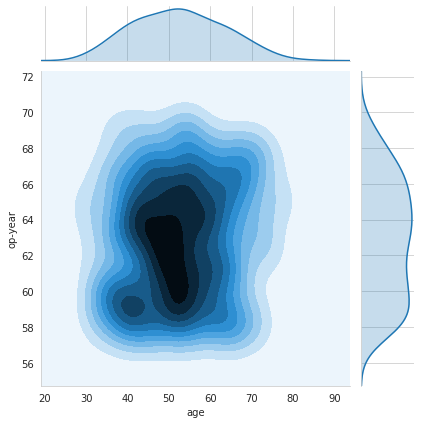

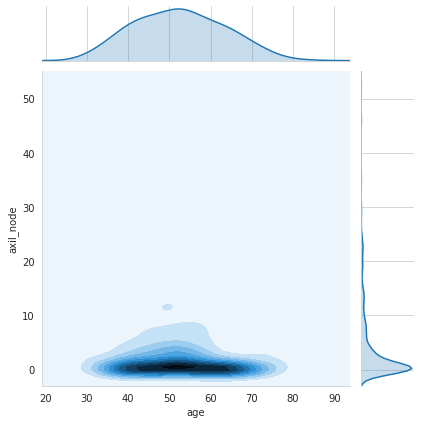

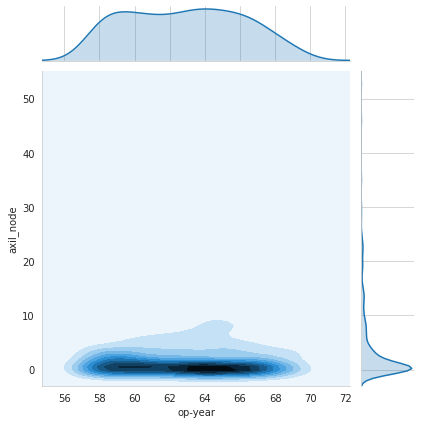

In [152]:
g = haberMan.groupby('Surv_status')

for group_name,items in g:
    print()
    print(group_name)
    
    for i in range(0,3):
        for j in range(i+1,3):
            sns.jointplot(x=col[i],y=col[j],data=haberMan,kind='kde')
            plt.show()
            plt.close()


Final Conclusion :

1.From this Dataset we can say that the majority of operations are performed on people age range between 38 and 68, where most of the points plotted on scatter plot (Operation_year vs Age)

2.We can see that there is quite good concentration of data point When axil_node is 0.

3.We can conclude that large number of operation were done in span of 7 years between 1960 and 1966 (Axil_nodes vs Operation_year)

4.Here with this scatter plot we get insight that patients with 0 axil nodes are more likely to survive irrespective to there age. (Axil_node vs Age)

5.It is very much less likely to have patients with axil nodes more than 30.

6.Patients who are older than 50 and have axil nodes greater than 10 are more likely to dead.

7.Most of the operations which were done in year 1960-65 were unsuccessfull as most the patients died within 5 years after opertaion.

8.Patients having who have 0 axil nodes are more likely to survive

9.Patients within range of 45-65 and had axil node >= 1 are more likely to die.

10.People less than age 40 are more likely to survive though having axil node greater than or equal to 1

11.Box plot shows that, the more number of axil nodes, the more patients likely to die

12.The patients who had axil nodes from 1 to 24 are the majority of patients who died.

13.After taking a look at box plot we can see that, the large number of patients who survived had 0 axil nodes or doesn't had it at all.

14.Patients and who died had axil node greater than or equal to 1, and as the concentration of axil node increases the repective patient is more likely to die.

Feature Importance:

1.Axil_nodes is most important feature in this dataset, as who had Axil node >= 1 those are more likely to die.

2.Age is also somewhat important feature of this dataset, because we have seen that patients who aged less than 40 are likely to survive inspite of having axil node >= 1
